In [91]:
import tweepy
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys
import datetime
import GetOldTweets3 as got
import re
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import time
import networkx as nx

In [8]:
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (12, 8),
                     "figure.facecolor" : "white",
                     "axes.edgecolor":  "black"})

To scrape data from Twitter, we can use the Twitter API - either directly, or via a nice wrapper like tweepy. We'll start off by using tweepy. For this (and any Twitter API access), you need to apply for a developer code. See https://developer.twitter.com/en/docs for more info.

In [9]:
# if you share your code, be sure to never leave the tokens and secrets!
consumer_key=""
consumer_secret=""
access_token=""
access_token_secret=""

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
auth_api = API(auth)

In [72]:
# this is the official tweepy "Hello World" to make sure everything is set-up correctly
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Conway tribute podcast is now on YouTube too. 

▶️ https://t.co/Z4m1Mo3o0Z

🍊 https://t.co/92stEB4gIT

🍏… https://t.co/6GPV737jQ1
"There is risk and truth to yourself and the world before you."

Poet Seamus Heaney, born #OTD 81 years ago, was aw… https://t.co/2kyefZ1xNH
"If we cannot gather to assemble or vote, much less deliberate, in what sense can we have a democracy?"… https://t.co/YT3G7Y79ju
RT @ericlchaney: Excellent thread. It's about the UK but applies to most EU countries, actually.
‘Messiah is Handel’s grandest work – though many musicians feel they ought to seem rather sniffy about its populari… https://t.co/rRDGIKSarE
This helps to explain what the UK was trying to do, before our modelling (understandably) had to pivot in order to… https://t.co/CZtCXaluJU
Big Data Could Undermine the COVID-19 Response  https://t.co/UzsULn2EJG https://t.co/mn7Uebn2X4
英国政界促政府干预 阻止中资收购战略资产 - BBC News 中文 https://t.co/MMLQYQ8nHL
RT @qiskit: We are thrilled to announce a new lecture series on Qis

Unfortunately, the Twitter API (and any Twitter API wrapper, such as tweepy), limits historical tweet data calls to the past 7 days. So, to get around this we use GetOldTweets3, which can be found here: https://pypi.org/project/GetOldTweets3/

In [11]:
# set our general search params
starting_date = "2020-03-01"
ending_date = "2020-04-14"
max_tweets = 9999

In [12]:
# get some tweets!
NeuroMatch_key = "NeuroMatch"
NeuroMatch_tweet_criteria = got.manager.TweetCriteria().setQuerySearch(NeuroMatch_key)\
                                                        .setSince(starting_date)\
                                                        .setUntil(ending_date)\
                                                        .setMaxTweets(max_tweets)
NeuroMatch_tweets = got.manager.TweetManager.getTweets(NeuroMatch_tweet_criteria)
NeuroMatch_first_tweet = NeuroMatch_tweets[-1]
NeuroMatch_latest_tweet = NeuroMatch_tweets[0]

In [13]:
print("For key", NeuroMatch_key, "we have", len(NeuroMatch_tweets), "tweets")
print("Starting with a tweet from", NeuroMatch_first_tweet.username, "on", NeuroMatch_first_tweet.date)
print("Ending with a tweet from", NeuroMatch_latest_tweet.username, "on", NeuroMatch_latest_tweet.date)

For key NeuroMatch we have 112 tweets
Starting with a tweet from KordingLab on 2020-03-06 15:25:33+00:00
Ending with a tweet from laurenatlas on 2020-04-13 17:09:57+00:00


In order to check that "NeuroMatch" and "neuromatch" aren't evaluated differently, i.e. that the keyword search is not case-sensitive, we'll do another search and check this.

In [14]:
neuromatch_key = "neuromatch"
neuromatch_tweet_criteria = got.manager.TweetCriteria().setQuerySearch(neuromatch_key)\
                                                        .setSince(starting_date)\
                                                        .setUntil(ending_date)\
                                                        .setMaxTweets(max_tweets)
neuromatch_tweets = got.manager.TweetManager.getTweets(neuromatch_tweet_criteria)
neuromatch_latest_tweet = neuromatch_tweets[0]
neuromatch_first_tweet = neuromatch_tweets[-1]

In [15]:
print("For key", neuromatch_key, "we have", len(neuromatch_tweets), "tweets")
print("Starting with a tweet from", neuromatch_first_tweet.username, "on", neuromatch_first_tweet.date)
print("Ending with a tweet from", neuromatch_latest_tweet.username, "on", neuromatch_latest_tweet.date)

For key neuromatch we have 112 tweets
Starting with a tweet from KordingLab on 2020-03-06 15:25:33+00:00
Ending with a tweet from laurenatlas on 2020-04-13 17:09:57+00:00


In [16]:
NeuroMatch_tweets == neuromatch_tweets

False

We might think the above cell should evaluate `True`, but actually it evaluates as `False`. Why? Because when GetOldTweets3 uses `TweetManager` to `getTweets` it embeds the search criteria into the identities of the `tweet` objects, and is case senstive. To show they are actually the same tweets, though, we can test if their texts are all the same.

In [17]:
True * False

0

In [18]:
True * True

1

In [19]:
truly_the_same = True
for t in range(0,len(NeuroMatch_tweets)):
    truly_the_same *= NeuroMatch_tweets[t].text == neuromatch_tweets[t].text
print(truly_the_same)

1


They're the same, so let's now gather tweets with other variations of "NeuroMatch" while ignoring case-sensitivity.

In [20]:
neuromatch2020_key = "neuromatch2020"
neuromatch2020_tweet_criteria = got.manager.TweetCriteria().setQuerySearch(neuromatch2020_key)\
                                                        .setSince(starting_date)\
                                                        .setUntil(ending_date)\
                                                        .setMaxTweets(max_tweets)
neuromatch2020_tweets = got.manager.TweetManager.getTweets(neuromatch2020_tweet_criteria)
neuromatch2020_latest_tweet = neuromatch2020_tweets[0]
neuromatch2020_first_tweet = neuromatch2020_tweets[-1]

In [21]:
print("For key", neuromatch2020_key, "we have", len(neuromatch2020_tweets), "tweets")
print("Starting with a tweet from", neuromatch2020_first_tweet.username, "on", neuromatch2020_first_tweet.date)
print("Ending with a tweet from", neuromatch2020_latest_tweet.username, "on", neuromatch2020_latest_tweet.date)

For key neuromatch2020 we have 490 tweets
Starting with a tweet from neuralreckoning on 2020-03-17 18:39:51+00:00
Ending with a tweet from LewisChuang on 2020-04-13 16:16:53+00:00


In [22]:
neuro_match_key = "neuro match"
neuro_match_tweet_criteria = got.manager.TweetCriteria().setQuerySearch(neuro_match_key)\
                                                        .setSince(starting_date)\
                                                        .setUntil(ending_date)\
                                                        .setMaxTweets(max_tweets)
neuro_match_tweets = got.manager.TweetManager.getTweets(neuro_match_tweet_criteria)
neuro_match_latest_tweet = neuro_match_tweets[0]
neuro_match_first_tweet = neuro_match_tweets[-1]

In [23]:
print("For key", neuro_match_key, "we have", len(neuro_match_tweets), "tweets")
print("Starting with a tweet from", neuro_match_first_tweet.username, "on", neuro_match_first_tweet.date)
print("Ending with a tweet from", neuro_match_latest_tweet.username, "on", neuro_match_latest_tweet.date)

For key neuro match we have 165 tweets
Starting with a tweet from tmj_stl_nursing on 2020-03-02 21:00:48+00:00
Ending with a tweet from laurenatlas on 2020-04-13 17:09:57+00:00


That the "neuro match" key turned up a result before Konrad made some of his first announcements on Twitter made me suspicious of this key's results. Let's look at the tweets' texts to investigate...

In [24]:
for t in neuro_match_tweets:
    print(t.text)

Very relevant for the 45% of voters who want fewer in-person conferences post-COVID19! Virtual meetings can still provide an opportunity for jr investigators to share work & have conversations, with some advantages. see the link for @KordingLab's advice after the 1st #neuromatch 
Hi Martin, congrats on your ERC! Did you consider advertising your position through neuromatch?
This match ruled
Nervous to apply for a job like "Acute Care Neurologist BC/BE" at Sutter East Bay Medical Group? Apply even if you're not a 100% match. You might be underestimating your value. Click the link in our bio for more info. #Neurology #Berkeley, CA
I just got blackout, there’s no way I can match this
Nervous to apply for a job like "Vascular Neurologist" at UPMC Altoona? Apply even if you're not a 100% match. You might be underestimating your value. Click the link in our bio for more info. #Neurology #Altoona, PA
Nervous to apply for a job like "RN Ortho / Neuro" at Blanchard Valley Health System? Apply e

It seems there are many "true" NeuroMatch results here, e.g. we can see tags for @KordingLab @RussPoldrack, @BehrensTimB, and @SuryaGanguli in some tweets, and the hashtag #neuromatch. But there are also a bunch of unrelated tweets about sports, neuroscience, and various other tweets which happened to hit this more general set of seperated keywords. N.B. GetOldTweets3 matches tweets word-by-word, so when we seperate "neuromatch" to "neuro match" we get all of "neuromatch" and also any other tweets where "neuro" and "match" exist in some combination in the tweet data (either a combination of the tweet next or it can even be the tweet text and other data, such as the username).

We'll therefore stick with "neuromatch" and "neuromatch2020". So let's compile those into a big list of all tweets while ensuring:
- the sub-string "neuromatch" exists in the text of the tweet (this captures "neuromatch" and "neuromatch2020")
- that all tweets are unique, i.e. no duplicates in our final list of all tweets

In [27]:
accepted_tweets = []
tweets_text = []
duplicated_tweets = []
nokey_tweets = []

for i in range(0, len(neuromatch_tweets)-1):
    tweet = neuromatch_tweets[i]
    if re.search("neuromatch", tweet.text, re.IGNORECASE):
        if not tweet.text in tweets_text:
            accepted_tweets.append(tweet)
            tweets_text.append(tweets_text)
        else:
            rejected_tweets.append(tweet.text)
    else:
        nokey_tweets.append(tweet.text)

for i in range(0, len(neuromatch2020_tweets)-1):
    tweet = neuromatch2020_tweets[i]
    if re.search("neuromatch", tweet.text, re.IGNORECASE):
        if not tweet.text in tweets_text:
            accepted_tweets.append(tweet)
            tweets_text.append(tweets_text)
        else:
            rejected_tweets.append(tweet.text)
    else:
        nokey_tweets.append(tweet.text)

In [28]:
print("Total of", len(accepted_tweets), "tweets accepted, with", len(duplicated_tweets), 
    "duplicates and", len(nokey_tweets), "tweets without the sub-string 'neuromatch' (case insensitive)")

Total of 600 tweets accepted, with 0 duplicates and 0 tweets without the sub-string 'neuromatch' (case insensitive)


In [31]:
tweet_texts = [] # content of the tweets
user_ids = [] # unique ID number for each user
user_names = [] # human-readable usernames
dates = [] # date and time of the tweet
locations = [] # geographic location (none recorded in this dataset)
favourites = [] # number of favourites
retweets = [] # number of retweets
mentions = [] # @mentions within the tweet
hashtags = [] # #hashtags within the tweet

for t in accepted_tweets:
    tweet_texts.append(t.text)
    user_ids.append(t.author_id)
    user_names.append(t.username)
    dates.append(t.date)
    locations.append(t.geo)
    favourites.append(t.favorites)
    retweets.append(t.retweets)
    mentions.append(t.mentions)
    hashtags.append(t.hashtags)

In [32]:
unique_tweeters = set(user_names)
print("A total of", len(unique_tweeters), "unique tweeters")

A total of 305 unique tweeters


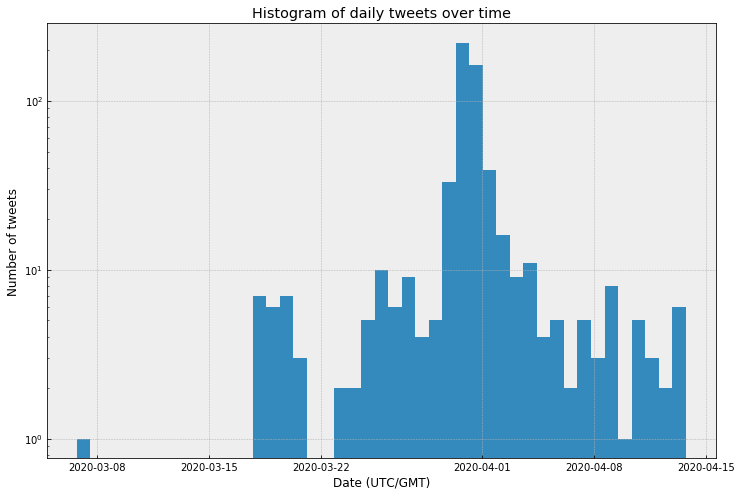

In [33]:
plt.title("Histogram of daily tweets over time")
plt.ylabel("Number of tweets")
plt.xlabel("Date (UTC/GMT)")
plt.hist(dates, bins=45, log=True) # with 45 bins because the data is over 45 days
plt.show()

In [34]:
tweets_by_tweeter = []
tweets_by_tweeter_names = []
for i in unique_tweeters:
    tweets_by_tweeter.append(user_names.count(i))
    tweets_by_tweeter_names.append(i)

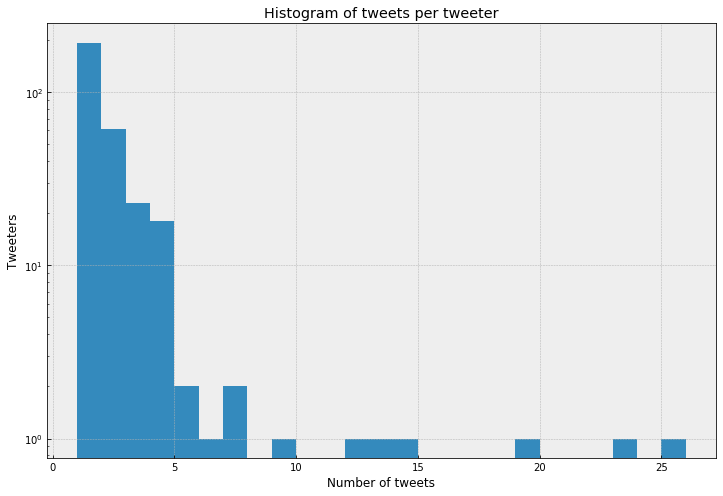

In [35]:
plt.title("Histogram of tweets per tweeter")
plt.ylabel("Tweeters")
plt.xlabel("Number of tweets")
plt.hist(tweets_by_tweeter, bins=25, log=True)
plt.show()

In [36]:
big_tweeter = tweets_by_tweeter_names[tweets_by_tweeter.index(max(tweets_by_tweeter))]
print("The tweeter with the most tweets was", big_tweeter, "with", max(tweets_by_tweeter), "tweets")

The tweeter with the most tweets was neuralreckoning with 26 tweets


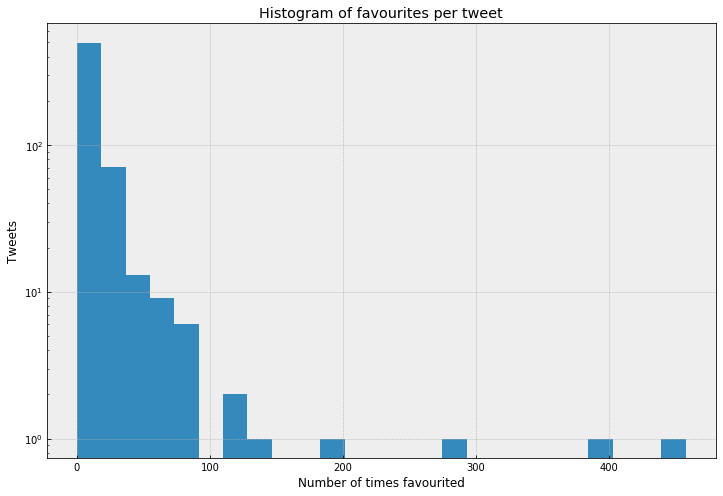

In [37]:
plt.title("Histogram of favourites per tweet")
plt.ylabel("Tweets")
plt.xlabel("Number of times favourited")
plt.hist(favourites, bins=25, log=True)
plt.show()

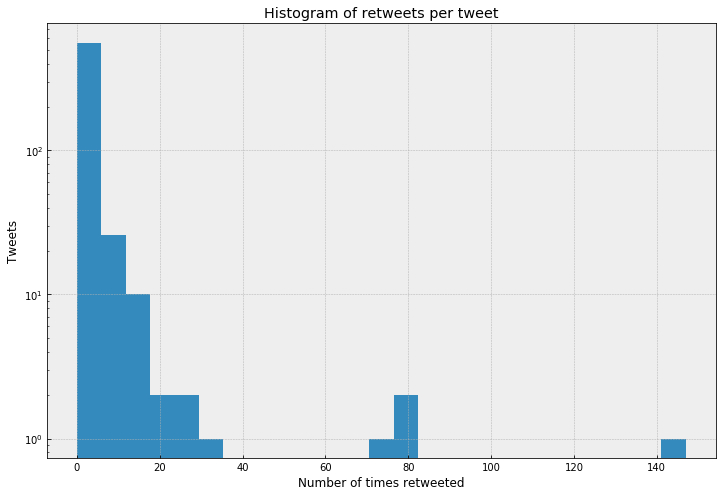

In [38]:
plt.title("Histogram of retweets per tweet")
plt.ylabel("Tweets")
plt.xlabel("Number of times retweeted")
plt.hist(retweets, bins=25, log=True)
plt.show()

In [39]:
tweets_with_mentions = list(filter(None, mentions))
print("Of", len(accepted_tweets), "tweets,", len(tweets_with_mentions), "mentioned another user, or", 
      len(tweets_with_mentions)/len(accepted_tweets)*100, "%")

Of 600 tweets, 264 mentioned another user, or 44.0 %


In [40]:
tweets_with_hashtags = list(filter(None, hashtags))
print("Of", len(accepted_tweets), "tweets,", len(tweets_with_hashtags), "mentioned another user, or", 
      len(tweets_with_hashtags)/len(accepted_tweets)*100, "%")

Of 600 tweets, 529 mentioned another user, or 88.16666666666667 %


In [42]:
hashtags_nonunique_set = list(set(tweets_with_hashtags))
hashtags_nonunique_list = []
for h in hashtags_nonunique_set:
    hs = list({tag.strip("#") for tag in h.split() if tag.startswith("#")})
    for hh in hs:
        hashtags_nonunique_list.append(hh)
hashtags_unique = list(set(hashtags_nonunique_list))

In [47]:
word_cloud_gen_unweighted = ' '.join(map(str, hashtags_unique))
word_cloud_gen_weighted = ' '.join(map(str, hashtags_nonunique_list))

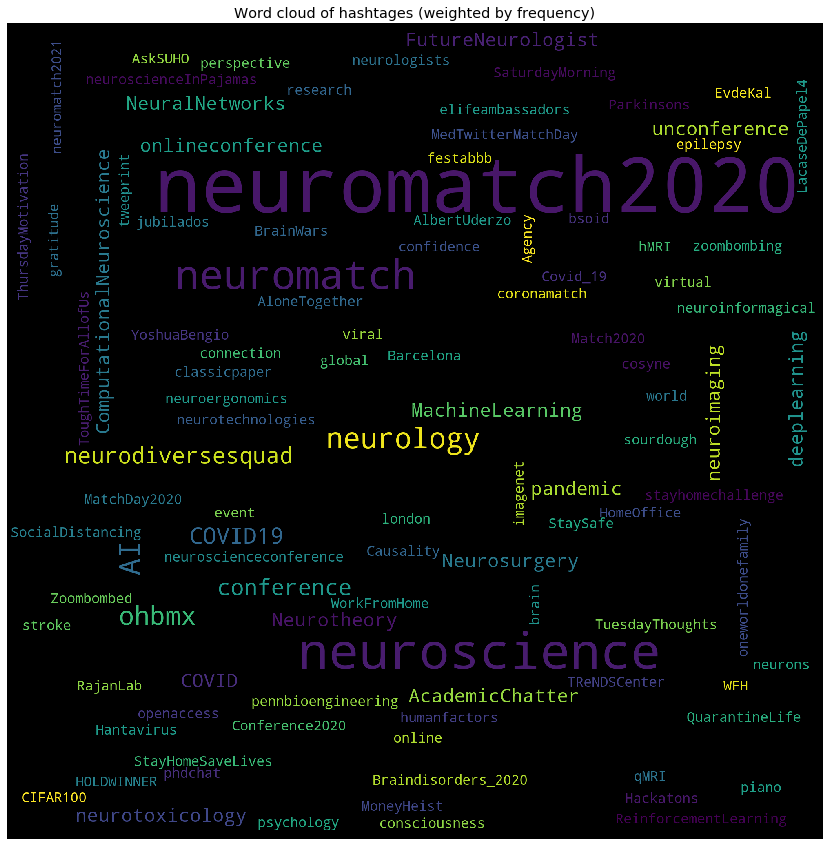

In [59]:
wordcloud = WordCloud(width = 2000, height = 2000, background_color='black',
                      min_font_size = 10).generate(word_cloud_gen_weighted)
plt.figure(figsize=(15, 15), facecolor=None)
plt.title("Word cloud of hashtages (weighted by frequency)")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

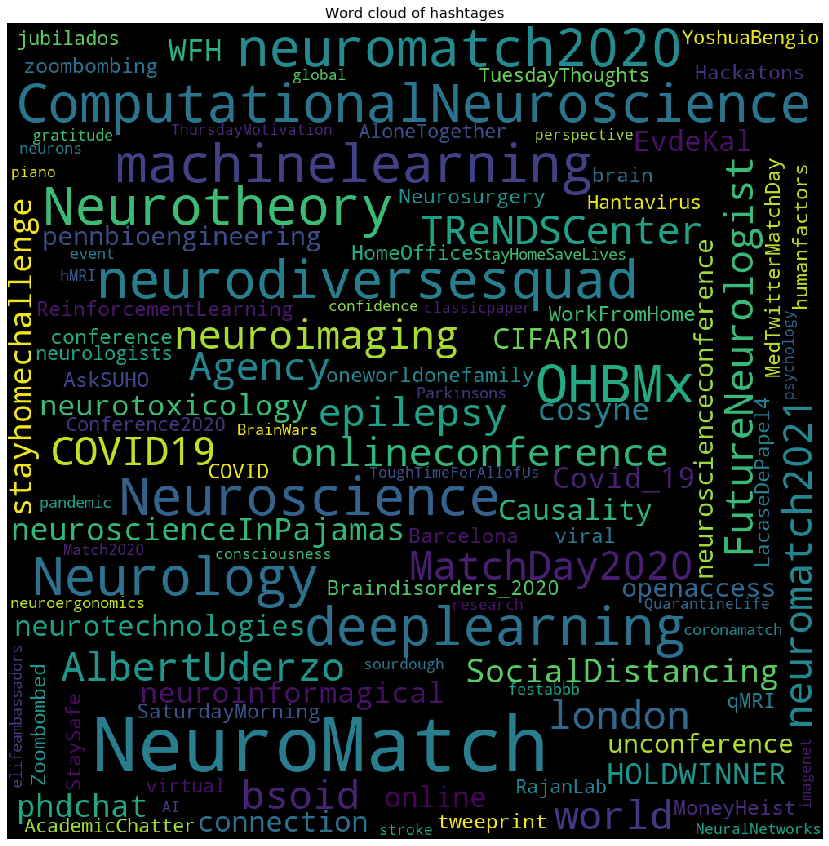

In [62]:
wordcloud = WordCloud(width=1000, height=1000, background_color='black',
                      min_font_size = 10).generate(word_cloud_gen_unweighted)
plt.figure(figsize=(15, 15), facecolor=None)
plt.title("Word cloud of hashtages")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [60]:
word_cloud_texts = ' '.join(map(str, tweet_texts))

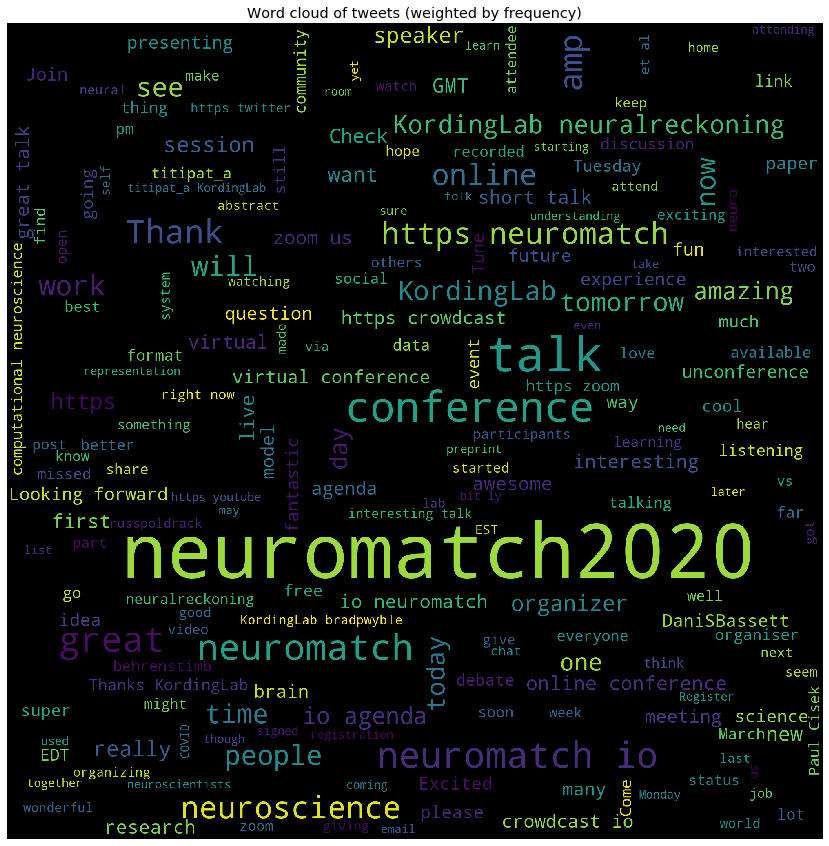

In [64]:
wordcloud = WordCloud(width = 2000, height = 2000, background_color='black',
                      min_font_size = 10).generate(word_cloud_texts)
plt.figure(figsize=(15, 15), facecolor=None)
plt.title("Word cloud of tweets (weighted by frequency)")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Okay, now let's explore the social structure of these twitter users!

In [97]:
def intersection(list1, list2): 
    return set(list1).intersection(list2)

unique_ids = set(user_ids)

In [ ]:
G=nx.Graph()
for participant in unique_ids:
    ids = []
    for page in tweepy.Cursor(api.followers_ids, user_id=participant).pages():
        ids.extend(page)
    neuromatch_follower = list(intersection(set(ids), set(user_ids)))
    for follower in neuromatch_follower:
        G.add_edge(follower, participant)

Rate limit reached. Sleeping for: 896


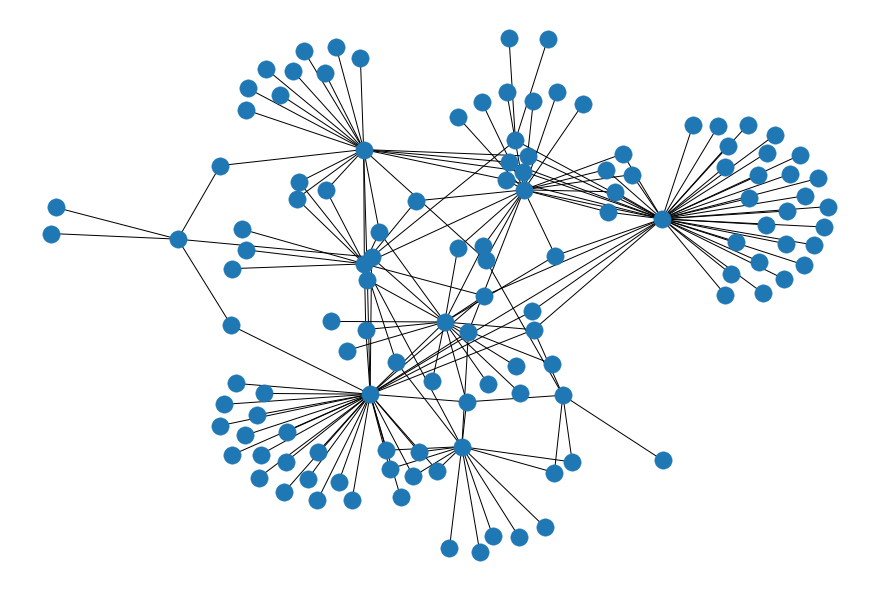

In [112]:
nx.draw(G)

In [113]:
participant

950844994830684165